In [1]:
import h5py
import numpy as np
import os
import pickle
import scipy
from scipy.stats import norm
from collections import defaultdict

import matplotlib
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize,
         'figure.facecolor': 'w'}
pylab.rcParams.update(params)
from matplotlib import pyplot as plt

import dynesty
from dynesty import utils as dyfunc
from getdist import plots, MCSamples

%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '../code')
import plotter
import utils
from utils import *

In [2]:
statistics = ['wp', 'xi', 'xi2', 'upf', 'mcf']
stat_strs_single = np.loadtxt('../tables/statistic_sets_single.txt', dtype=str)
stat_strs_addin = np.loadtxt('../tables/statistic_sets_addin.txt', dtype=str)
stat_strs_addin_full = np.concatenate((['wp'], stat_strs_addin))
stat_strs_scale = np.concatenate((stat_strs_single, ['wp_xi_xi2_mcf', 'wp_xi_xi2_upf_mcf']))


params_keydeliverable = ['Omega_m', 'sigma_8', 'f', 'fsigma8']
params_keycosmo = ['Omega_m', 'sigma_8', 'f']
params_keyhodab = ['M_sat', 'v_bs', 'f_env']
params_keymix = ['Omega_m', 'sigma_8', 'f', 'M_sat', 'v_bs', 'f_env']

id_pairs = np.loadtxt('../tables/id_pairs_recovery_test_70.txt', delimiter=',', dtype=np.int)

In [3]:
labels_single = [
                 make_label('wp'),
                 make_label('xi'),
                 make_label('xi2'),
                 make_label('upf'),
                 make_label('mcf')
                ]
labels_addin = [
                 make_label('wp'),
                 '+'+make_label('xi'),
                 '+'+make_label('xi2'),
                 '+'+make_label('upf'),
                 '+'+make_label('mcf'),
                ]
labels_addin_full = [
                 make_label('wp'),
                 make_label(['wp', 'xi']),
                 make_label(['wp', 'xi', 'xi2']),
                 make_label(['wp', 'xi', 'xi2', 'upf']),
                 make_label(['wp', 'xi', 'xi2', 'upf', 'mcf'])
                ]
labels_scale = np.concatenate((labels_single, 
                               [make_label(['wp', 'xi', 'xi2', 'upf']),
                                make_label(['wp', 'xi', 'xi2', 'upf', 'mcf'])]))

In [4]:
colors_single = ['skyblue',
          'limegreen',
          'orange',
          'red',
          'magenta'
         ]
# %23EF2A99-%23AD1122-%239412DC-%232115B3-%23841B66
colors_addin = ['#2115B3', '#9412DC', '#841B66', '#AD1122', '#EF2A99']
colors_scale = np.concatenate((colors_single, 
                               ['crimson', 'mediumvioletred']))

In [5]:
results_dict = defaultdict(dict)

for stat_str in stat_strs_single:
    print(stat_str)
    for i, id_pair in enumerate(id_pairs):
        
        id_cosmo, id_hod = id_pair
        chaintag = f'{stat_str}_c{id_cosmo}h{id_hod}_all_minscale0'
        result_dict_single = utils.construct_results_dict(chaintag)
        results_dict[stat_str][tuple(id_pair)] = result_dict_single

wp
xi
xi2
upf
mcf


Original, all scales:

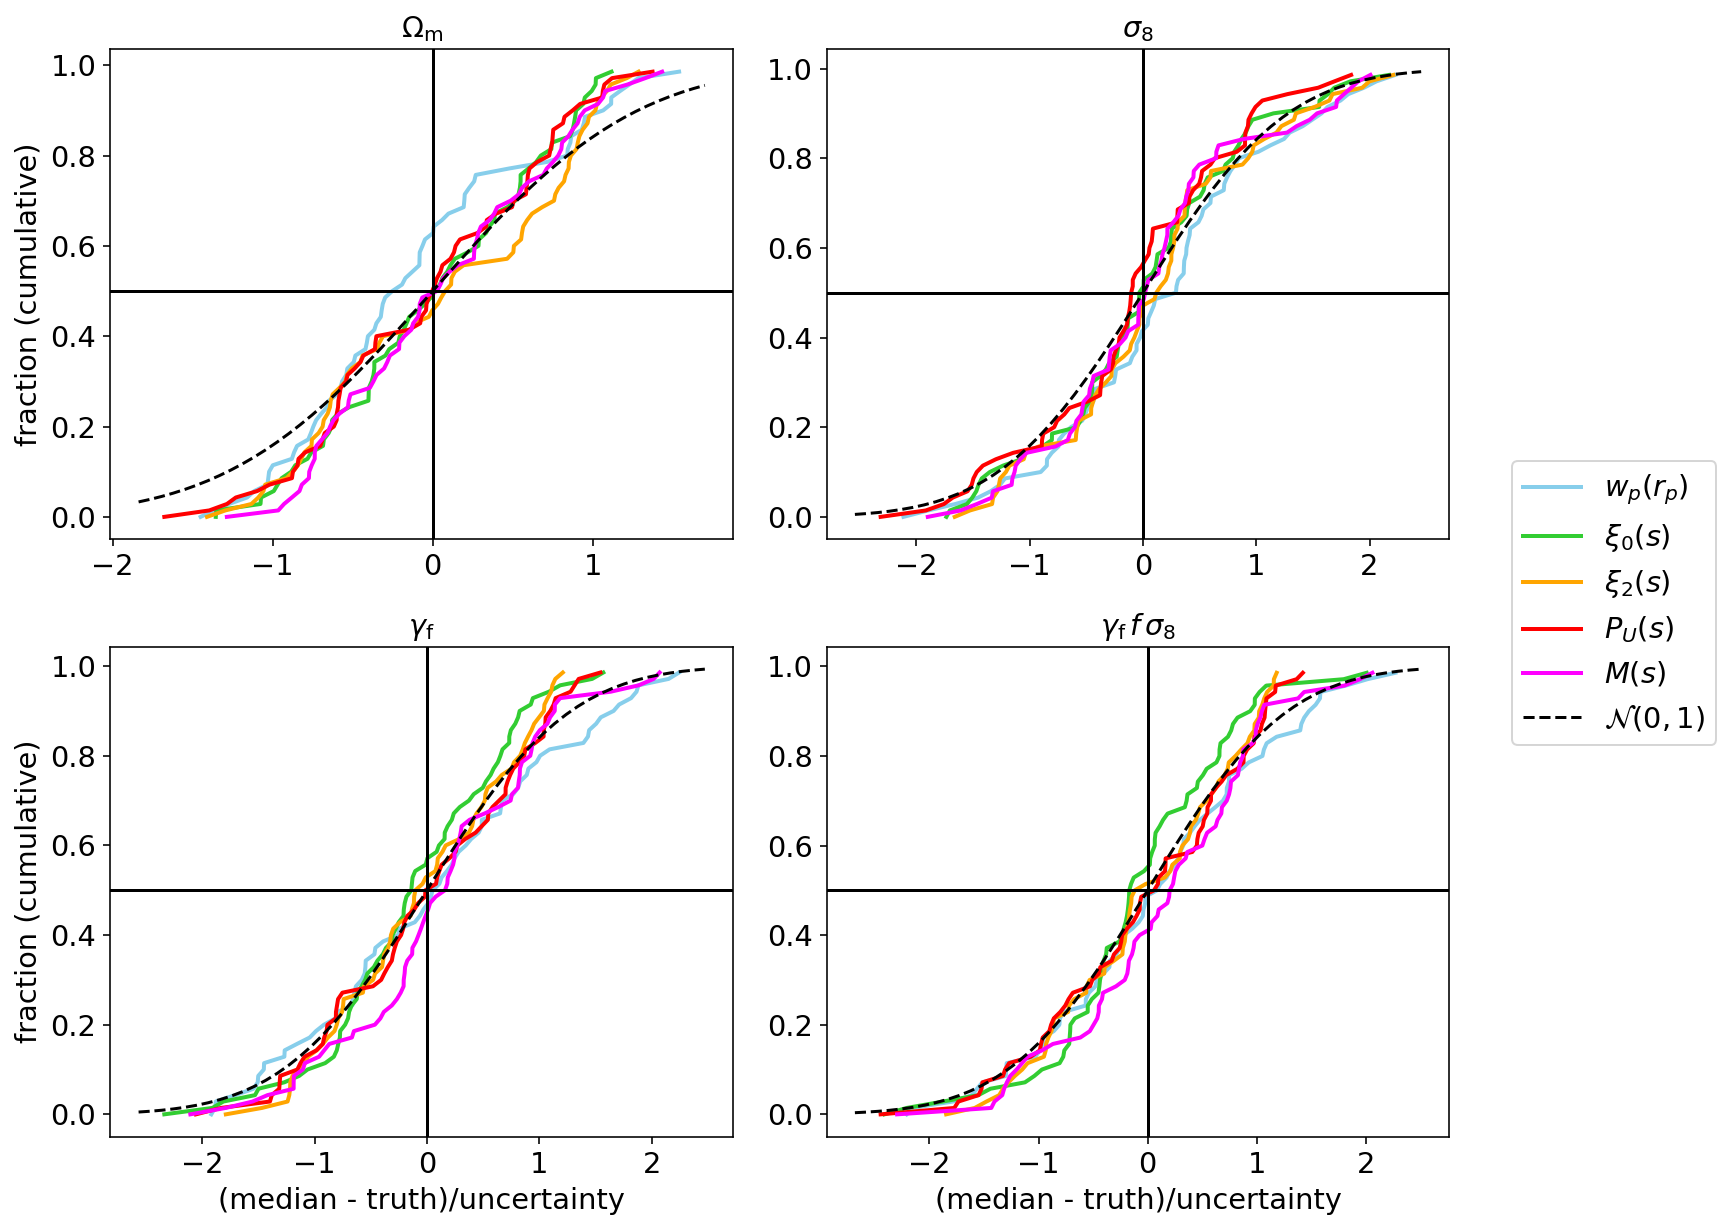

In [6]:
plotter.plot_cumulative_dist_figure(results_dict, params_keydeliverable, stat_strs_single, id_pairs, 
                                    labels_single, colors_single, divide_by_error=True)

In [7]:
results_dict_smallscales = defaultdict(dict)

for stat_str in stat_strs_single:
    print(stat_str)
    for i, id_pair in enumerate(id_pairs):
        
        id_cosmo, id_hod = id_pair
        chaintag = f'{stat_str}_c{id_cosmo}h{id_hod}_all_maxscale6'
        result_dict_single = utils.construct_results_dict(chaintag)
        results_dict_smallscales[stat_str][tuple(id_pair)] = result_dict_single

wp
xi
xi2
upf
mcf


Including only up to the 6th bin (excluding the highest 2, for all observables):

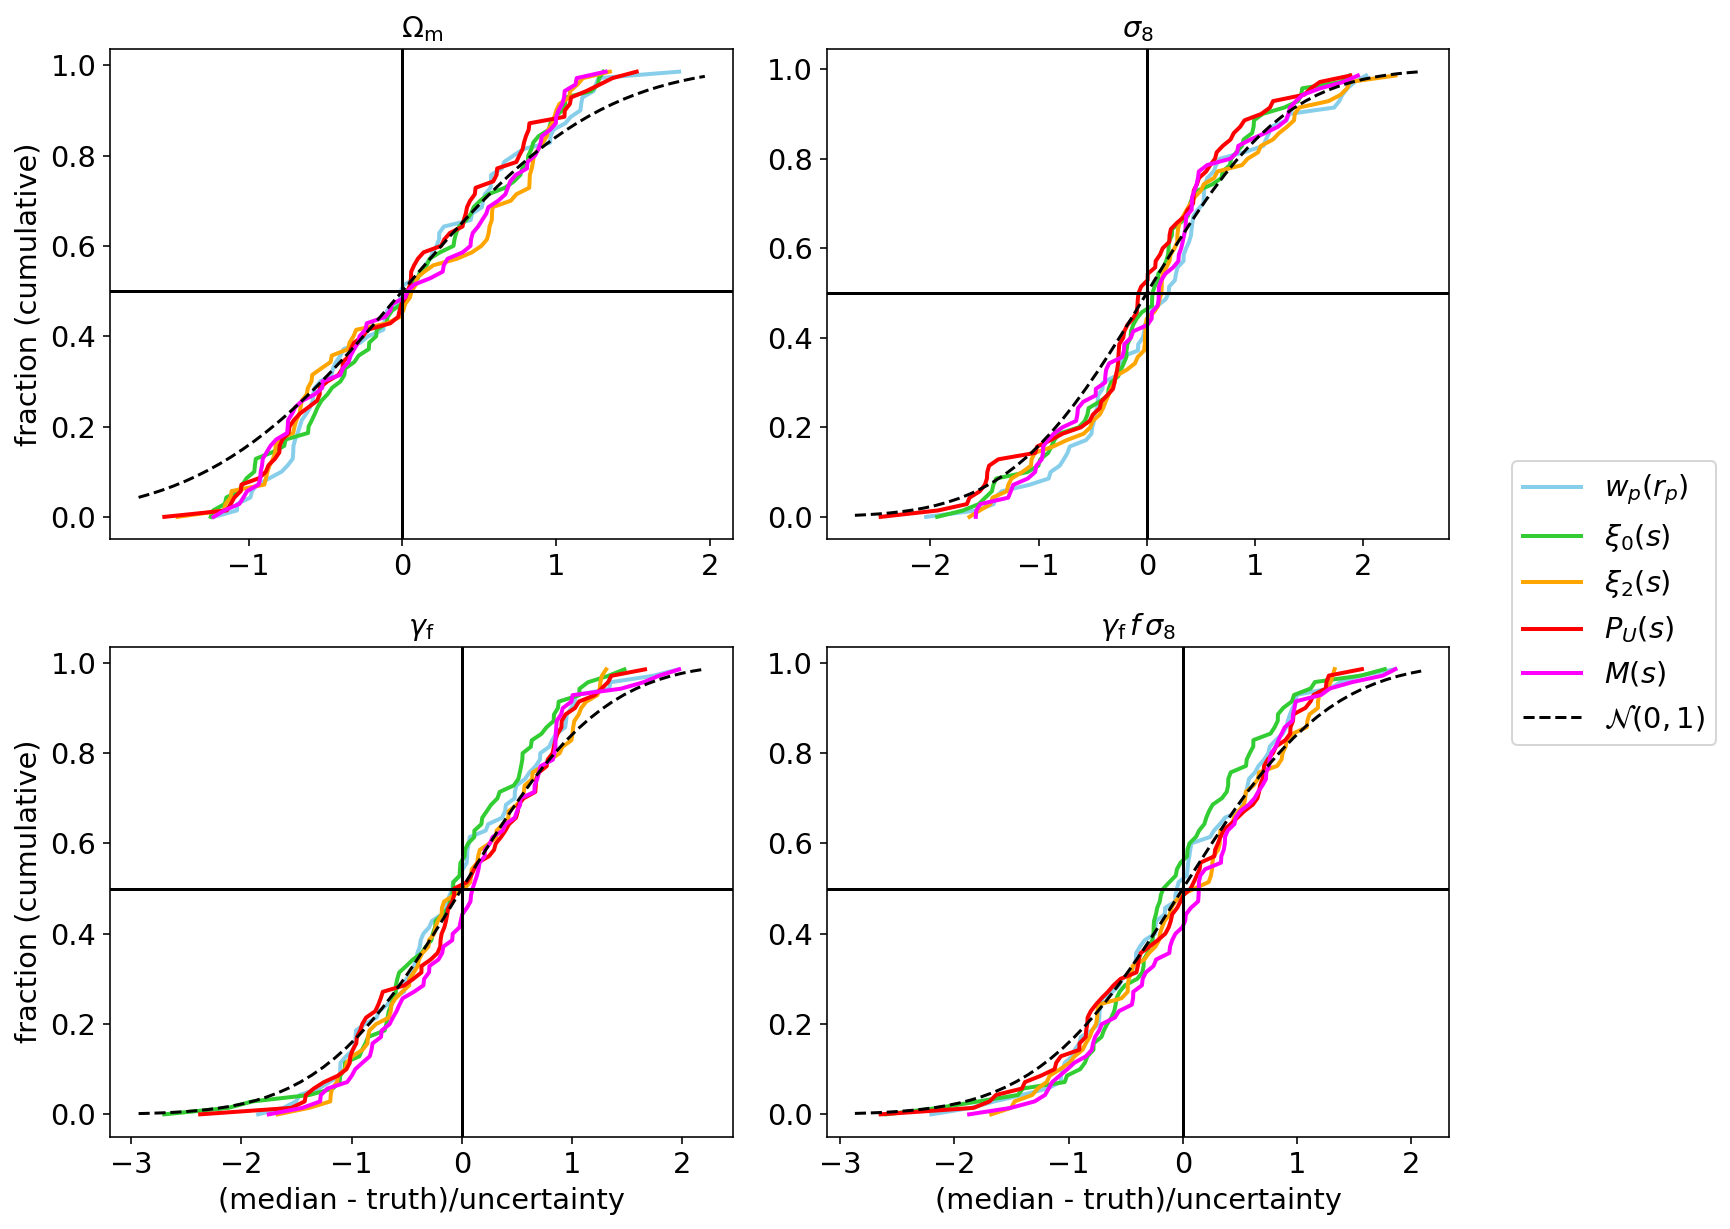

In [8]:
plotter.plot_cumulative_dist_figure(results_dict_smallscales, params_keydeliverable, stat_strs_single, id_pairs, 
                                    labels_single, colors_single, divide_by_error=True)

In [9]:
results_dict_wp_maxscales = defaultdict(dict)
stat_str = 'wp'
max_scales = np.arange(0, 9)
for max_scale in max_scales:
    print(max_scale)
    for i, id_pair in enumerate(id_pairs):

        id_cosmo, id_hod = id_pair
        chaintag = f'{stat_str}_c{id_cosmo}h{id_hod}_all_maxscale{max_scale}'
        result_dict_single = utils.construct_results_dict(chaintag)
        results_dict_wp_maxscales[max_scale][tuple(id_pair)] = result_dict_single

0
1
2
3
4
5
6
7
8


In [10]:
locs_norm = matplotlib.colors.Normalize(vmin=min(max_scales), vmax=max(max_scales))
cmap = matplotlib.cm.get_cmap('Blues')
colors_wp = [cmap(locs_norm(loc)) for loc in max_scales]
labels_wp = [make_label('wp')+f' (max scale {max_scale})' for max_scale in max_scales]

Wp only, varying the max scale:

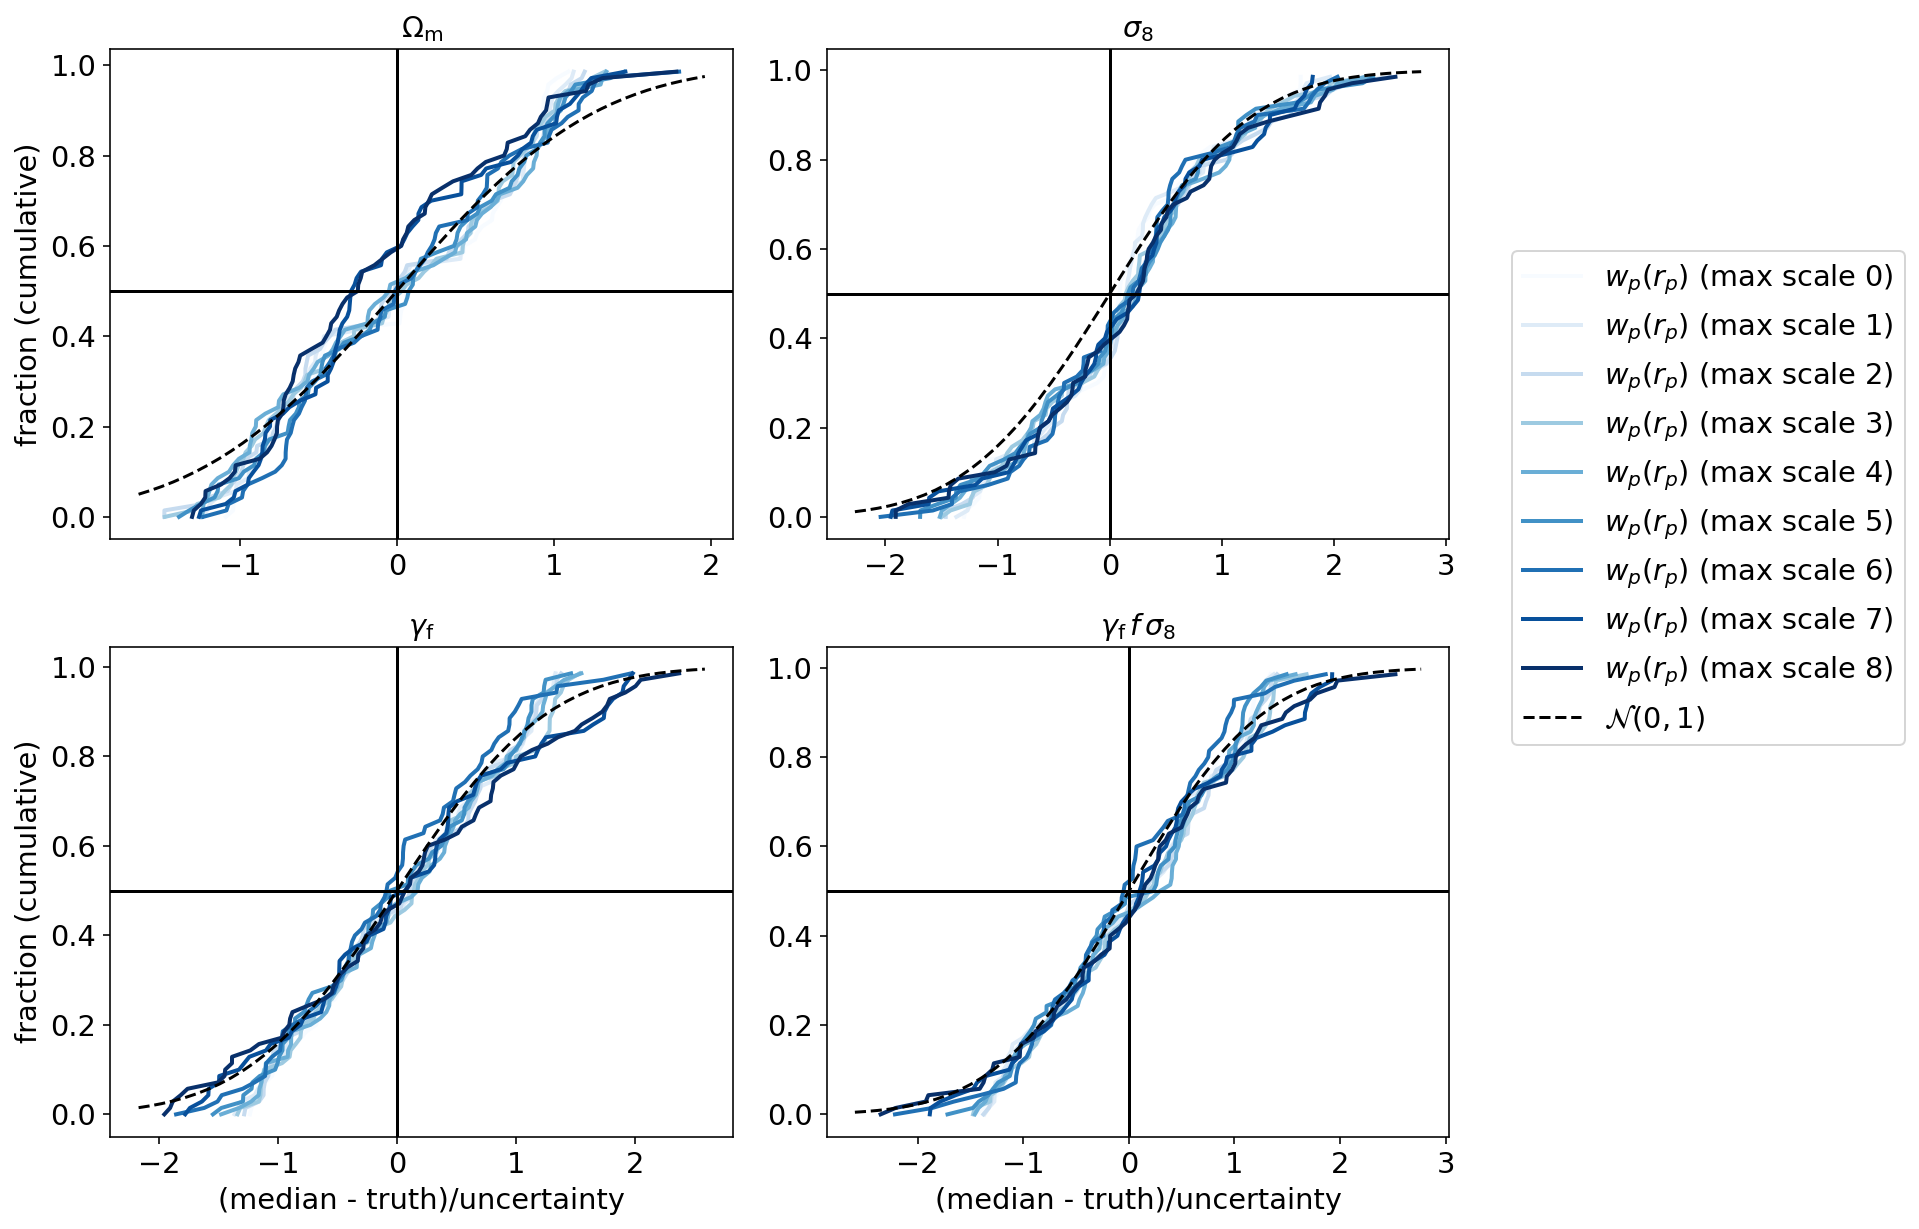

In [11]:
plotter.plot_cumulative_dist_figure(results_dict_wp_maxscales, params_keydeliverable, max_scales, id_pairs, 
                                    labels_wp, colors_wp, divide_by_error=True)

The two largest-scale bins bias the omega_m measurement!!!

## Effect on final constraints

In [12]:
chaintag_prior = 'prior'
prior_dict = construct_results_dict(chaintag_prior)

In [13]:
stat_strs_addin_all = np.concatenate((['wp'], stat_strs_addin))

In [14]:
for stat_str in stat_strs_addin_all:
    print(stat_str)
    for i, id_pair in enumerate(id_pairs):
        
        id_cosmo, id_hod = id_pair
        chaintag = f'{stat_str}_c{id_cosmo}h{id_hod}_all_minscale0'
        result_dict_add = utils.construct_results_dict(chaintag)
        results_dict[stat_str][tuple(id_pair)] = result_dict_add

wp
wp_xi
wp_xi_xi2
wp_xi_xi2_upf
wp_xi_xi2_upf_mcf


Including all scales:

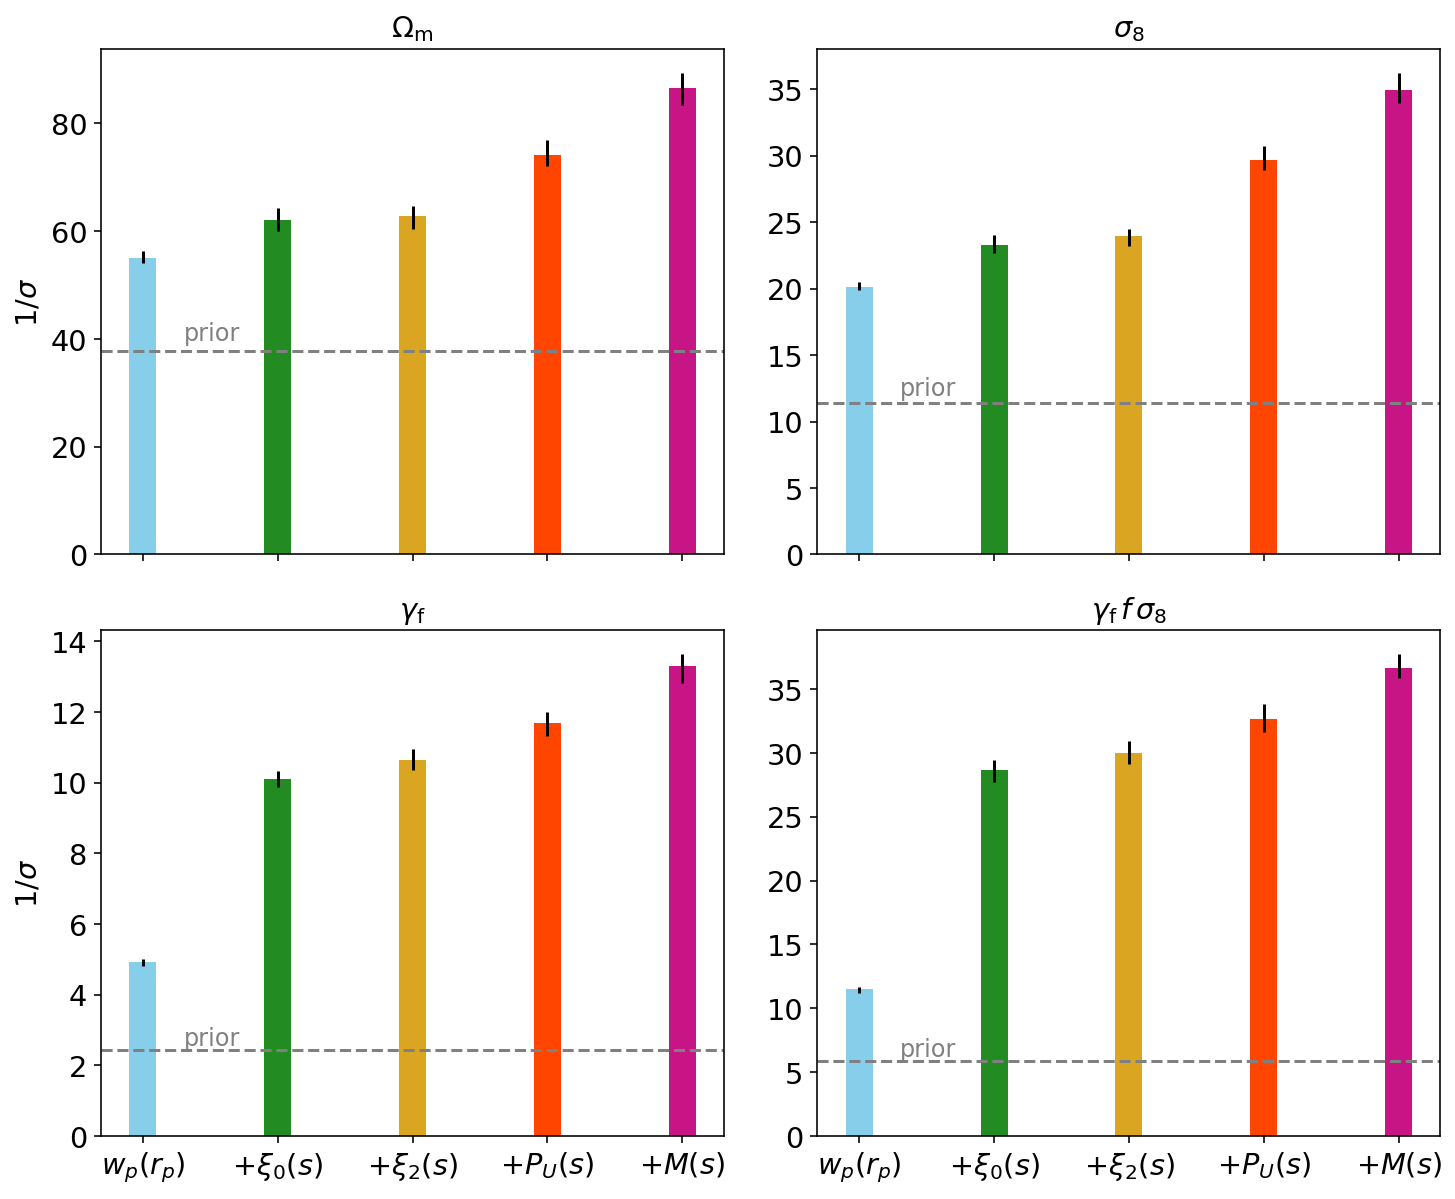

In [15]:
plotter.plot_uncertainty_figure(results_dict, prior_dict, params_keydeliverable, stat_strs_addin_all, 
                                id_pairs, labels_addin, colors_addin)
#plt.savefig(f'{plot_dir}/recovery_addin.pdf', bbox_inches='tight')

### Restricting wp scales:

In [16]:
results_dict_wpmaxscale6 = defaultdict(dict)
for stat_str in stat_strs_addin_full:
    print(stat_str)
    for i, id_pair in enumerate(id_pairs):
        
        id_cosmo, id_hod = id_pair
        chaintag = f'{stat_str}_c{id_cosmo}h{id_hod}_all_wpmaxscale6'
        result_dict_add = utils.construct_results_dict(chaintag)
        results_dict_wpmaxscale6[stat_str][tuple(id_pair)] = result_dict_add

wp
wp_xi
wp_xi_xi2
wp_xi_xi2_upf
wp_xi_xi2_upf_mcf


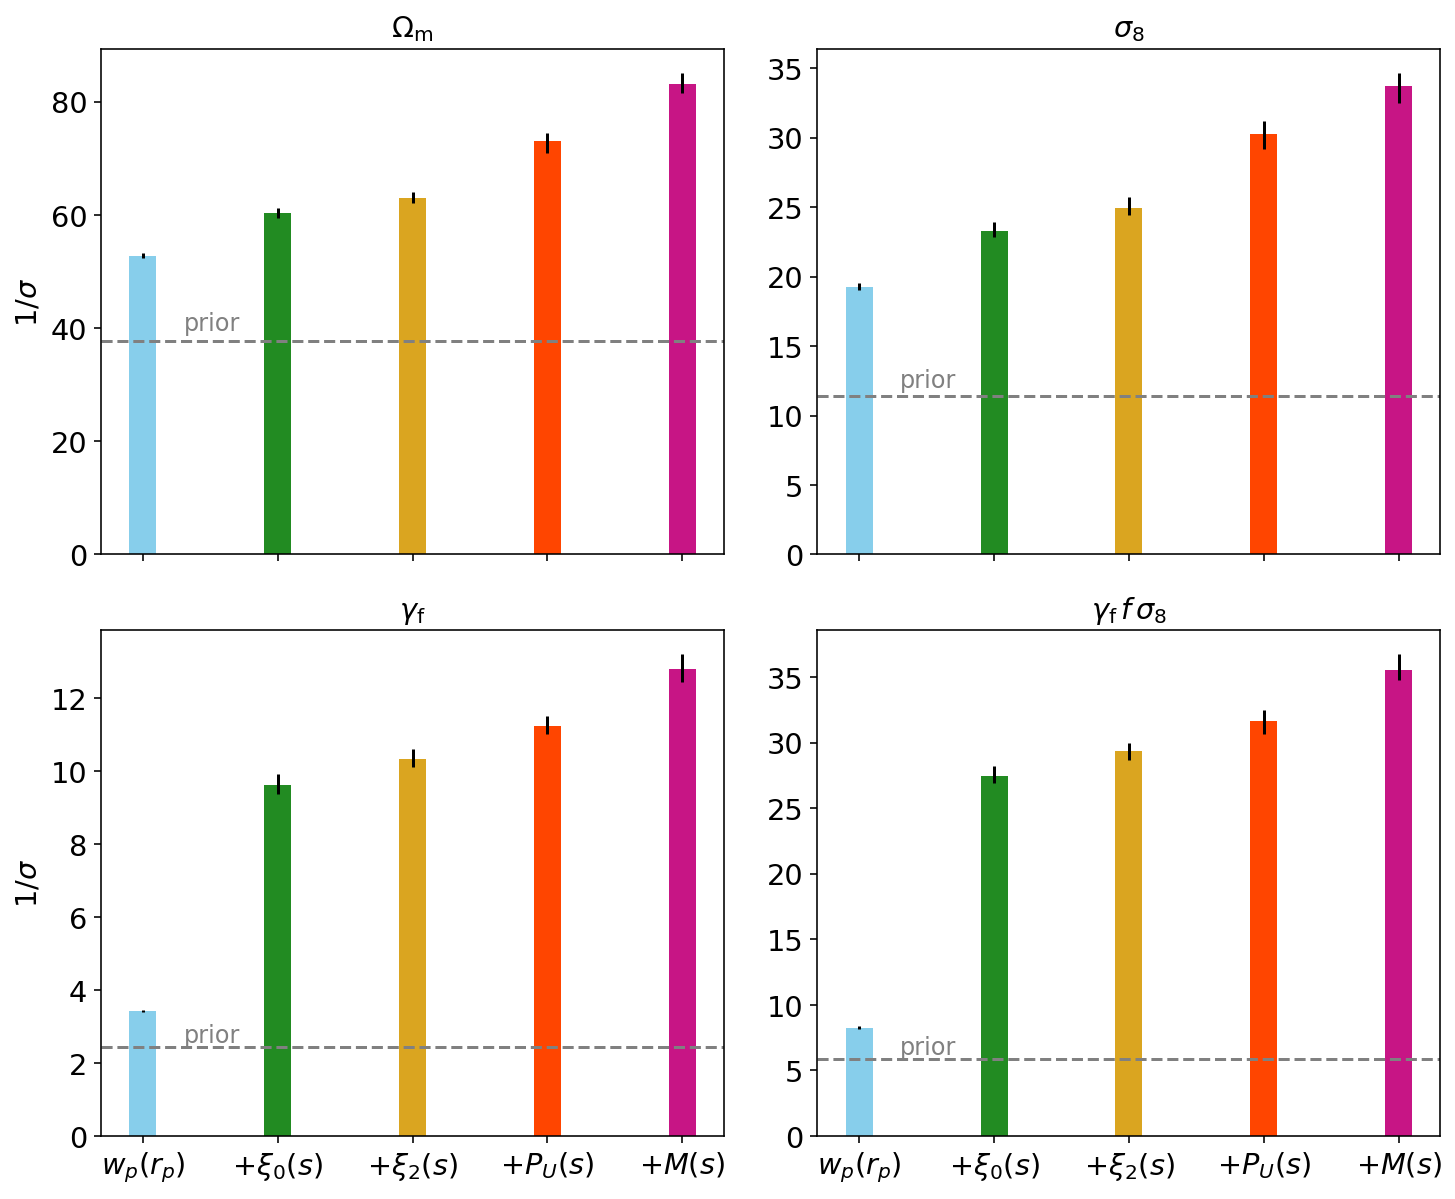

In [17]:
plotter.plot_uncertainty_figure(results_dict_wpmaxscale6, prior_dict, params_keydeliverable, stat_strs_addin_full, 
                                id_pairs, labels_addin, colors_addin)
#plt.savefig(f'{plot_dir}/recovery_addin.pdf', bbox_inches='tight')

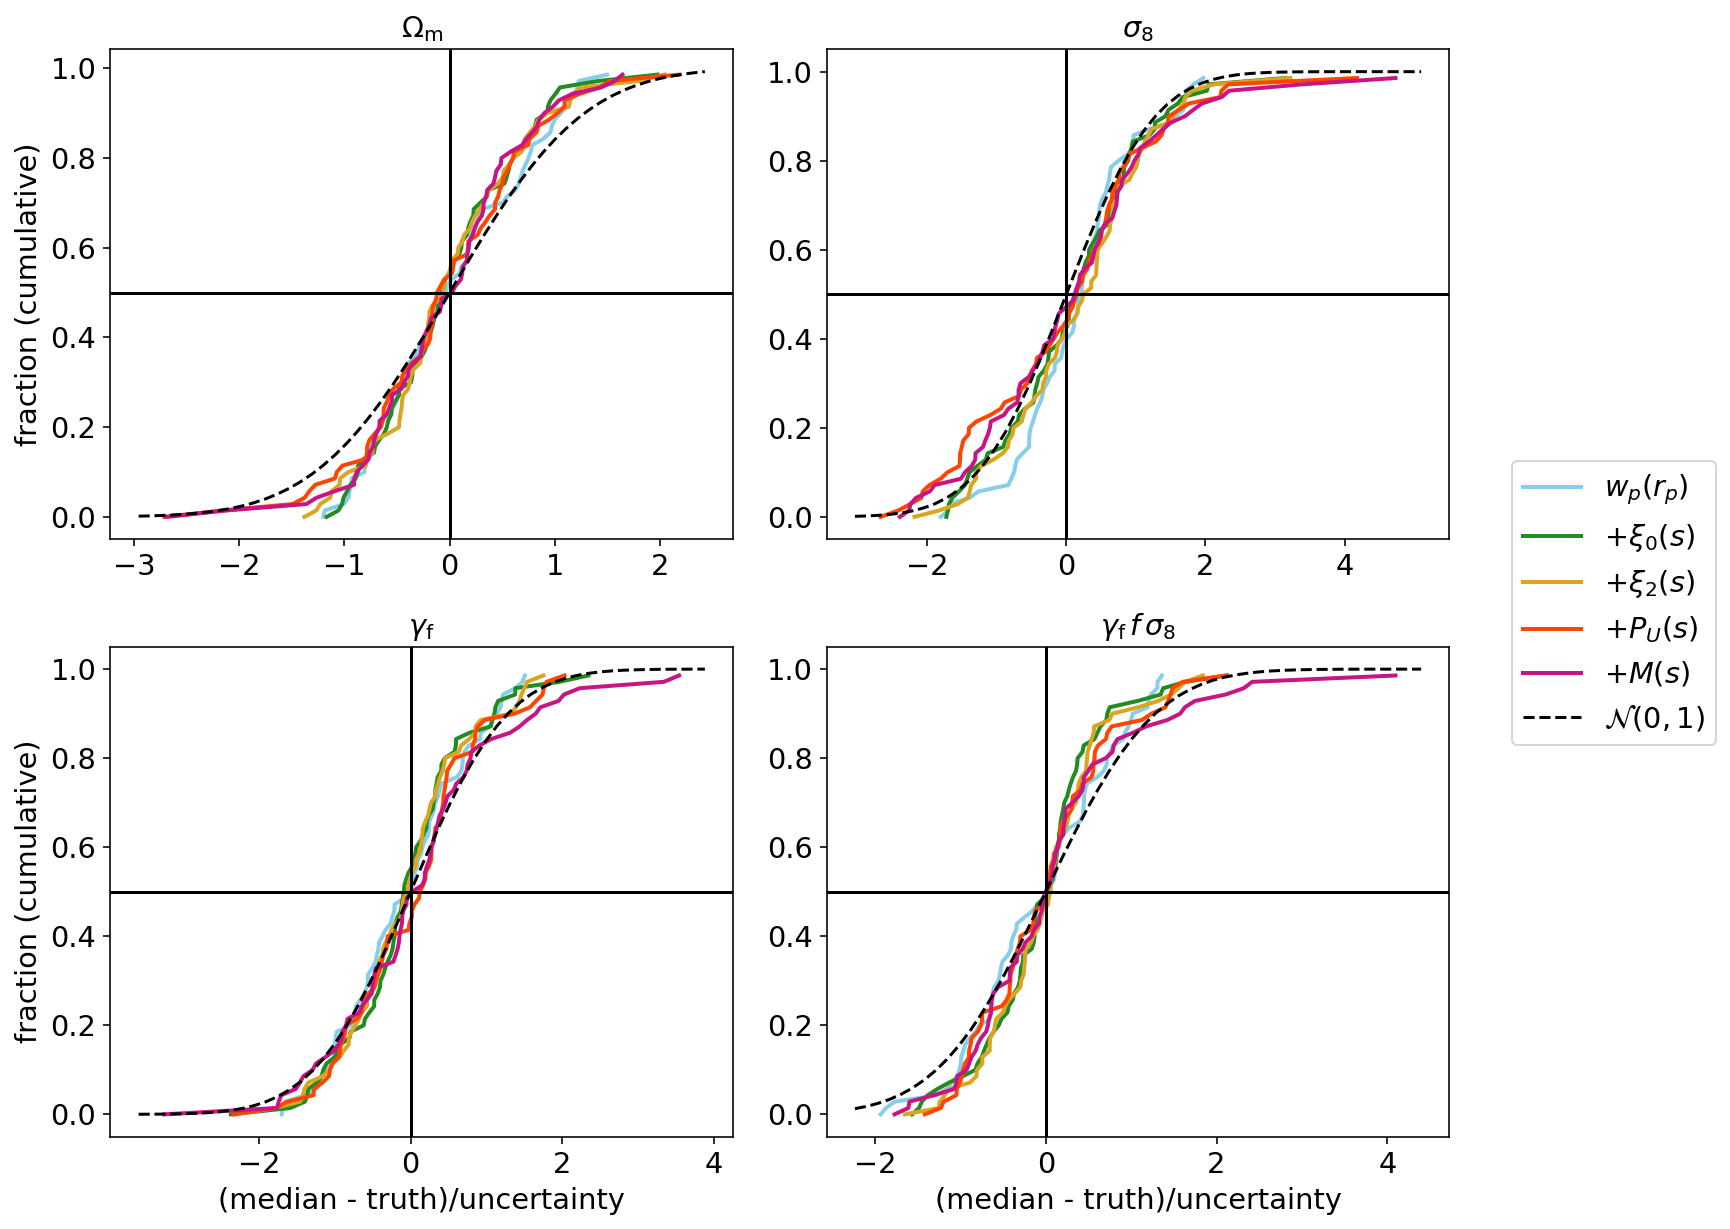

In [27]:
plotter.plot_cumulative_dist_figure(results_dict_wpmaxscale6, params_keydeliverable, stat_strs_addin_full, id_pairs, 
                                    labels_addin, colors_addin, divide_by_error=True)

### Comparing change in precision

All scales:

In [18]:
utils.print_uncertainty_results_abstract(results_dict, params_keydeliverable, id_pairs, prior_dict)

Omega_m
Prior: 0.0265
wp: 0.0182
wp_xi_xi2: 0.0159
wp_xi_xi2_upf_mcf: 0.0115
Increased precision from standard to beyond by: 27.5%

sigma_8
Prior: 0.0876
wp: 0.0496
wp_xi_xi2: 0.0418
wp_xi_xi2_upf_mcf: 0.0286
Increased precision from standard to beyond by: 31.4%

f
Prior: 0.4088
wp: 0.2036
wp_xi_xi2: 0.0940
wp_xi_xi2_upf_mcf: 0.0752
Increased precision from standard to beyond by: 20.0%

fsigma8
Prior: 0.1694
wp: 0.0871
wp_xi_xi2: 0.0333
wp_xi_xi2_upf_mcf: 0.0273
Increased precision from standard to beyond by: 18.1%



Restricting wp scales:

In [19]:
utils.print_uncertainty_results_abstract(results_dict_wpmaxscale6, params_keydeliverable, id_pairs, prior_dict)

Omega_m
Prior: 0.0265
wp: 0.0189
wp_xi_xi2: 0.0159
wp_xi_xi2_upf_mcf: 0.0120
Increased precision from standard to beyond by: 24.3%

sigma_8
Prior: 0.0876
wp: 0.0519
wp_xi_xi2: 0.0401
wp_xi_xi2_upf_mcf: 0.0296
Increased precision from standard to beyond by: 26.0%

f
Prior: 0.4088
wp: 0.2927
wp_xi_xi2: 0.0968
wp_xi_xi2_upf_mcf: 0.0781
Increased precision from standard to beyond by: 19.3%

fsigma8
Prior: 0.1694
wp: 0.1212
wp_xi_xi2: 0.0341
wp_xi_xi2_upf_mcf: 0.0281
Increased precision from standard to beyond by: 17.5%



## 700-model recovery set

In [20]:
id_pairs_700 = np.loadtxt('../tables/id_pairs_test.txt', delimiter=',', dtype=np.int)
stat_str = 'wp'
for i, id_pair in enumerate(id_pairs_700):  
    id_cosmo, id_hod = id_pair
    chaintag = f'{stat_str}_c{id_cosmo}h{id_hod}_all_minscale0'
    chain_results_dir = '/export/sirocco1/ksf293/aemulator/chains/results'
    chain_results_fn = f'{chain_results_dir}/results_{chaintag}.pkl'
    if not os.path.exists(chain_results_fn):
        print(id_pair)

In [21]:
results_dict_700 = defaultdict(dict)
id_pairs_700 = np.loadtxt('../tables/id_pairs_test.txt', delimiter=',', dtype=np.int)
stat_str = 'wp'
for i, id_pair in enumerate(id_pairs_700):  
    id_cosmo, id_hod = id_pair
    chaintag = f'{stat_str}_c{id_cosmo}h{id_hod}_all_minscale0'
    result_dict_single = utils.construct_results_dict(chaintag)
    results_dict_700[stat_str][tuple(id_pair)] = result_dict_single

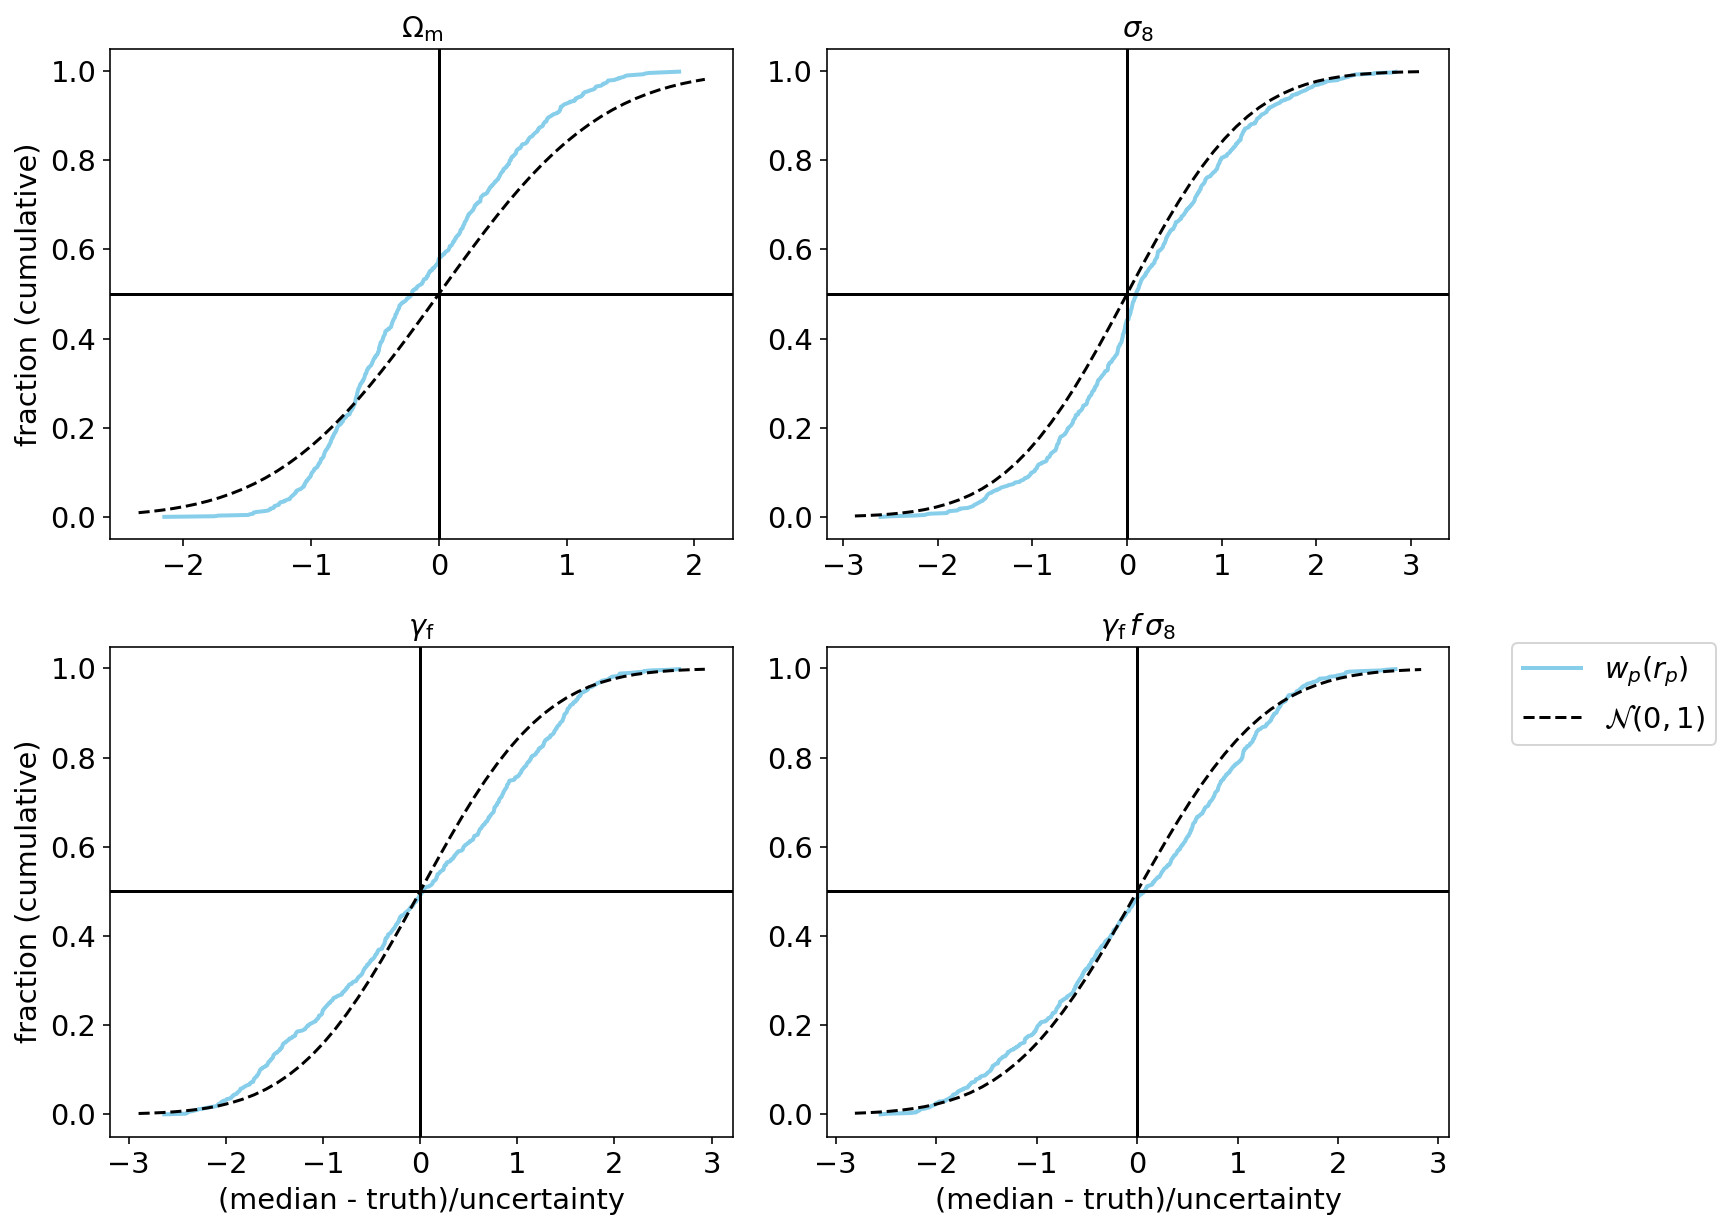

In [22]:
plotter.plot_cumulative_dist_figure(results_dict_700, params_keydeliverable, [stat_str], id_pairs_700, 
                                    labels_single[:1], colors_single[:1], divide_by_error=True)

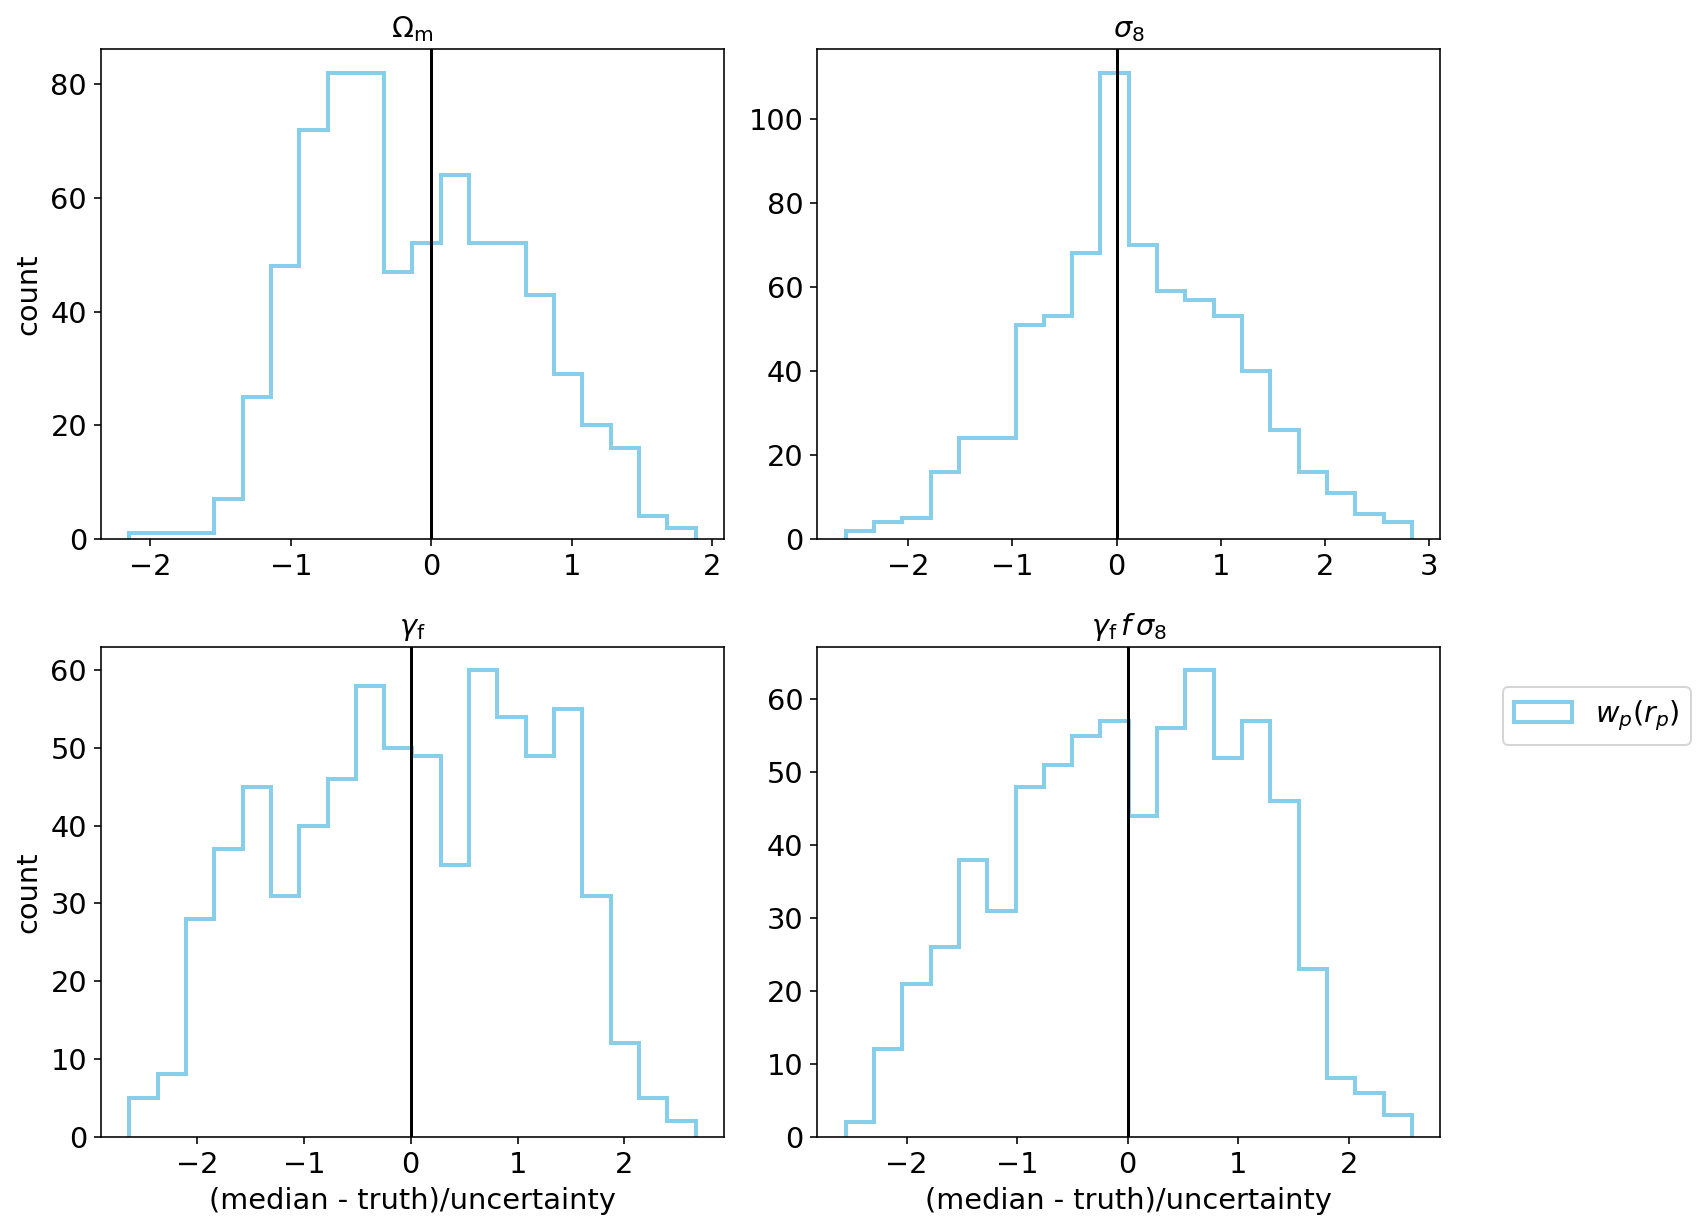

In [23]:
plotter.plot_histogram_figure(results_dict_700, params_keydeliverable, [stat_str], id_pairs_700, 
                              labels_single[:1], colors_single[:1], divide_by_error=True)

## Best-fit values

In [24]:
# emu_name = 'George'
# statistic = 'wp'
# scaling = 'log'
# Emu = utils.get_emu(emu_name)

# train_tag = f'_{emu_name}_{scaling}'
# model_fn = f'../models/model_{statistic}{train_tag}' #emu will add proper file ending
# scaler_x_fn = f'../models/scaler_x_{statistic}{train_tag}.joblib'
# scaler_y_fn = f'../models/scaler_y_{statistic}{train_tag}.joblib'
# err_fn = f"../../clust/covariances/error_aemulus_{statistic}_hod3_test0.dat"

# n_bins_tot = 9
# bins = np.array(list(range(0,n_bins_tot)))

# emu = Emu(statistic, scaling, model_fn, scaler_x_fn, scaler_y_fn, err_fn,
#           bins=bins, predict_mode=True)
# emu.load_model()

In [25]:
# max_scale = 8    


# ys_true = []
# ys_best = []

# for i, id_pair in enumerate(id_pairs[:10]):
# #for i, id_pair in enumerate([(0,0)]):

#     print(id_pair)
#     id_cosmo, id_hod = id_pair
#     chaintag = f'{stat_str}_c{id_cosmo}h{id_hod}_all_maxscale{max_scale}'
#     chain_results_dir = '/export/sirocco1/ksf293/aemulator/chains/results'
#     chain_results_fn = f'{chain_results_dir}/results_{chaintag}.pkl'
#     with open(chain_results_fn, 'rb') as pf:
#         res = pickle.load(pf)
#         samples = res['samples']
#         lnweight = np.array(res['logwt'])
#         lnevidence = np.array(res['logz'])
#         logl = np.array(res['logl'])
        
#         idx_min = np.argmin(logl)
#         params_best = samples[idx_min]
        
#         y_best = emu.predict(params_best)
#         ys_best.append(ys_best)

        
#     chain_fn = f'../chains/param_files/chain_params_{chaintag}.h5'
#     fw = h5py.File(chain_fn, 'r')
#     params_true = fw.attrs['true_values']
#     y_true = fw.attrs['ys_observed']
#     ys_true.append(y_true)
#     fw.close()
    
# ys_true = np.array(ys_true)
# ys_best = np.array(ys_best)